# Generating Trade Signals using Moving Average(MA) Crossover Strategy — A Python implementation

Taken from: https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a


In [1]:
import pandas as pd
from ta import add_all_ta_features
import ta
from ta.utils import dropna
import seaborn as sns
import numpy as np

In [2]:
TSLA = pd.read_csv("TSLA.csv")
AMZN = pd.read_csv("AMZN.csv")

In [3]:
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500
1,2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
2,2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
3,2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000
4,2020-04-20,146.539993,153.113998,142.442001,149.272003,149.272003,73733000


In [4]:
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-14,2200.469971,2292.000000,2186.209961,2283.320068,2283.320068,8087200
1,2020-04-15,2257.679932,2333.370117,2245.000000,2307.679932,2307.679932,6866600
2,2020-04-16,2346.000000,2461.000000,2335.000000,2408.189941,2408.189941,12038200
3,2020-04-17,2372.330078,2400.000000,2316.020020,2375.000000,2375.000000,7930000
4,2020-04-20,2389.949951,2444.979980,2386.050049,2393.610107,2393.610107,5770700


In [5]:
TSLA.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
249,2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600
250,2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700
251,2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44534700
252,2021-04-14,770.700012,780.789978,733.726685,737.020081,737.020081,43959273


In [6]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


<AxesSubplot:xlabel='Date'>

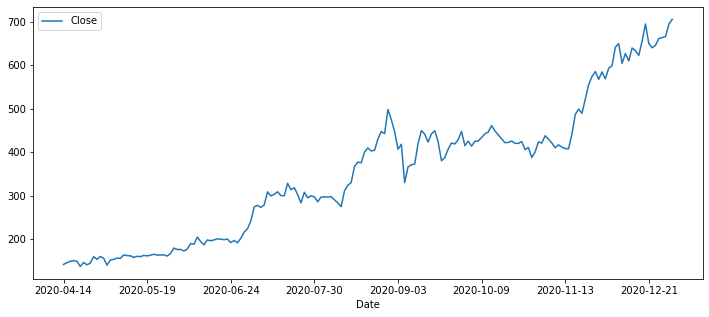

In [7]:
TSLA.set_index('Date', inplace=True)
TSLA.truncate(after='2021-01-01')['Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

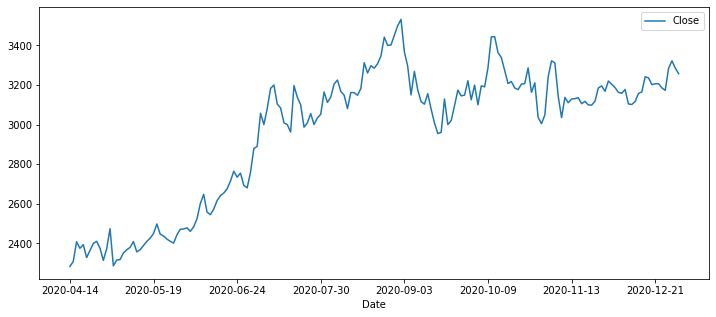

In [8]:
AMZN.set_index('Date', inplace=True)
AMZN.truncate(after='2021-01-01')['Close'].plot(legend=True,figsize=(12,5))

In [9]:
TSLA["ema20"] = ta.trend.EMAIndicator(close = TSLA["Close"], window = 20).ema_indicator()
TSLA["ema50"] = ta.trend.EMAIndicator(close = TSLA["Close"], window = 50).ema_indicator()
TSLA["sma20"] = ta.trend.SMAIndicator(close = TSLA["Close"], window = 20).sma_indicator()
TSLA["sma50"] = ta.trend.SMAIndicator(close = TSLA["Close"], window = 50).sma_indicator()

In [10]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,ema20,ema50,sma20,sma50
Date,,,,,,,,,,
2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500,NaN,NaN,NaN,NaN
2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000,NaN,NaN,NaN,NaN
2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500,NaN,NaN,NaN,NaN
2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000,NaN,NaN,NaN,NaN
2020-04-20,146.539993,153.113998,142.442001,149.272003,149.272003,73733000,NaN,NaN,NaN,NaN


# SMA SIGNALS

In [17]:
TSLA['Signal'] = 0.0
TSLA['Signal'] = np.where(TSLA['sma20'] > TSLA['sma50'], 1.0, 0.0)
TSLA['Position'] = TSLA['Signal'].diff()
# display first few rows
TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume,ema20,ema50,sma20,sma50,Signal,Position
Date,,,,,,,,,,,,
2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300,669.971155,689.367241,666.177493,721.797797,0.0,0.0
2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600,670.642476,688.883036,665.048496,718.054998,0.0,0.0
2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700,673.627000,689.396642,665.460996,715.385997,0.0,0.0
2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44534700,682.073953,692.256382,668.179996,714.761797,0.0,0.0
2021-04-14,770.700012,780.789978,733.726685,737.020081,737.020081,43959273,687.306917,694.011821,671.187000,712.705999,0.0,0.0


- When ‘Position’ = 1, it implies that the Signal has changed from 0 to 1 meaning a short-term(faster) moving average has crossed above the long-term(slower) moving average, thereby triggering a buy call.

- When ‘Position’ = -1, it implies that the Signal has changed from 1 to 0 meaning a short-term(faster) moving average has crossed below the long-term(slower) moving average, thereby triggering a sell call.


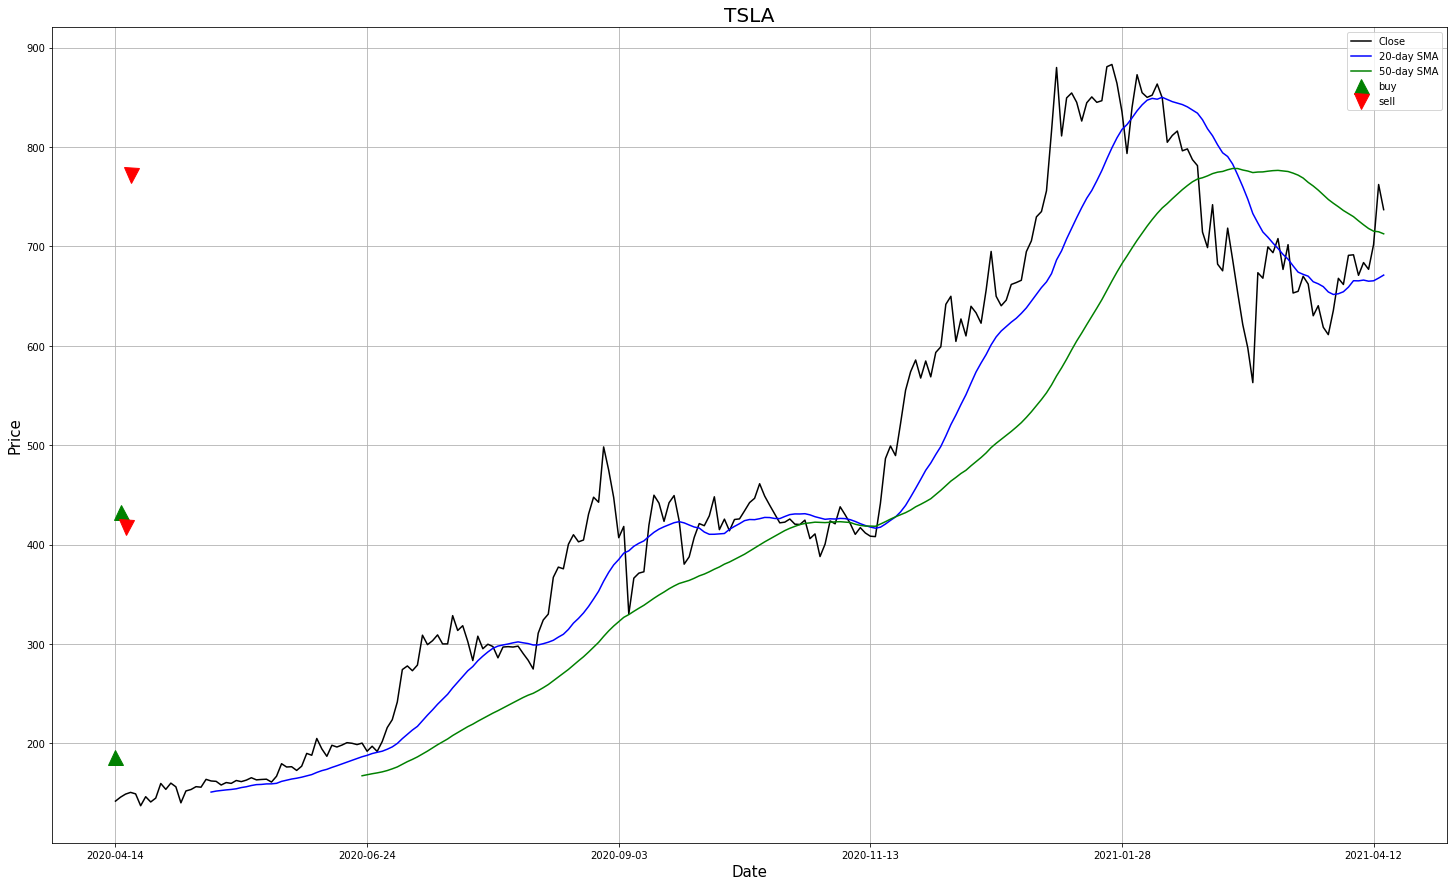

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,15))
# plot close price, short-term and long-term moving averages 
TSLA['Close'].plot(color = 'k', label= 'Close') 
TSLA['sma20'].plot(color = 'b',label = '20-day SMA') 
TSLA['sma50'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(TSLA[TSLA['Position'] == 1].index, 
         TSLA['sma20'][TSLA['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(TSLA[TSLA['Position'] == -1].index, 
         TSLA['sma20'][TSLA['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TSLA', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# EMA SIGNALS

So far we have discussed the moving average crossover strategy using the simple moving averages(SMAs). It is straightforward to observe that SMA time-series are much less noisy than the original price. However, this comes at a cost — SMA lag the original price, which means that changes in the trend are only seen with a delay of L days. How much is this lag L? For a SMA moving average calculated using M days, the lag is roughly around M/2 days. Thus, if we are using a 50 days SMA, this means we may be late by almost 25 days, which can significantly affect our strategy.

One way to reduce the lag induced by the use of the SMA is to use Exponential Moving Average(EMA). Exponential moving averages give more weight to the most recent periods. This makes them more reliable than SMAs as they are comparatively better representation of the recent performance of the asset. The EMA is calculated as:
EMA [today] = (α x Price [today] ) + ((1 — α) x EMA [yesterday] )

Where:
α = 2/(N + 1)
N = the length of the window (moving average period)
EMA [today] = the current EMA value
Price [today] = the current closing price
EMA [yesterday] = the previous EMA value

In [13]:
TSLA['Signal'] = 0.0
TSLA['Signal'] = np.where(TSLA['ema20'] > TSLA['ema50'], 1.0, 0.0)
TSLA['Position'] = TSLA['Signal'].diff()
# display first few rows
TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume,ema20,ema50,sma20,sma50,Signal,Position
Date,,,,,,,,,,,,
2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300,669.971155,689.367241,666.177493,721.797797,0.0,0.0
2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600,670.642476,688.883036,665.048496,718.054998,0.0,0.0
2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700,673.627000,689.396642,665.460996,715.385997,0.0,0.0
2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44534700,682.073953,692.256382,668.179996,714.761797,0.0,0.0
2021-04-14,770.700012,780.789978,733.726685,737.020081,737.020081,43959273,687.306917,694.011821,671.187000,712.705999,0.0,0.0


ValueError: s must be a scalar, or float array-like with the same size as x and y

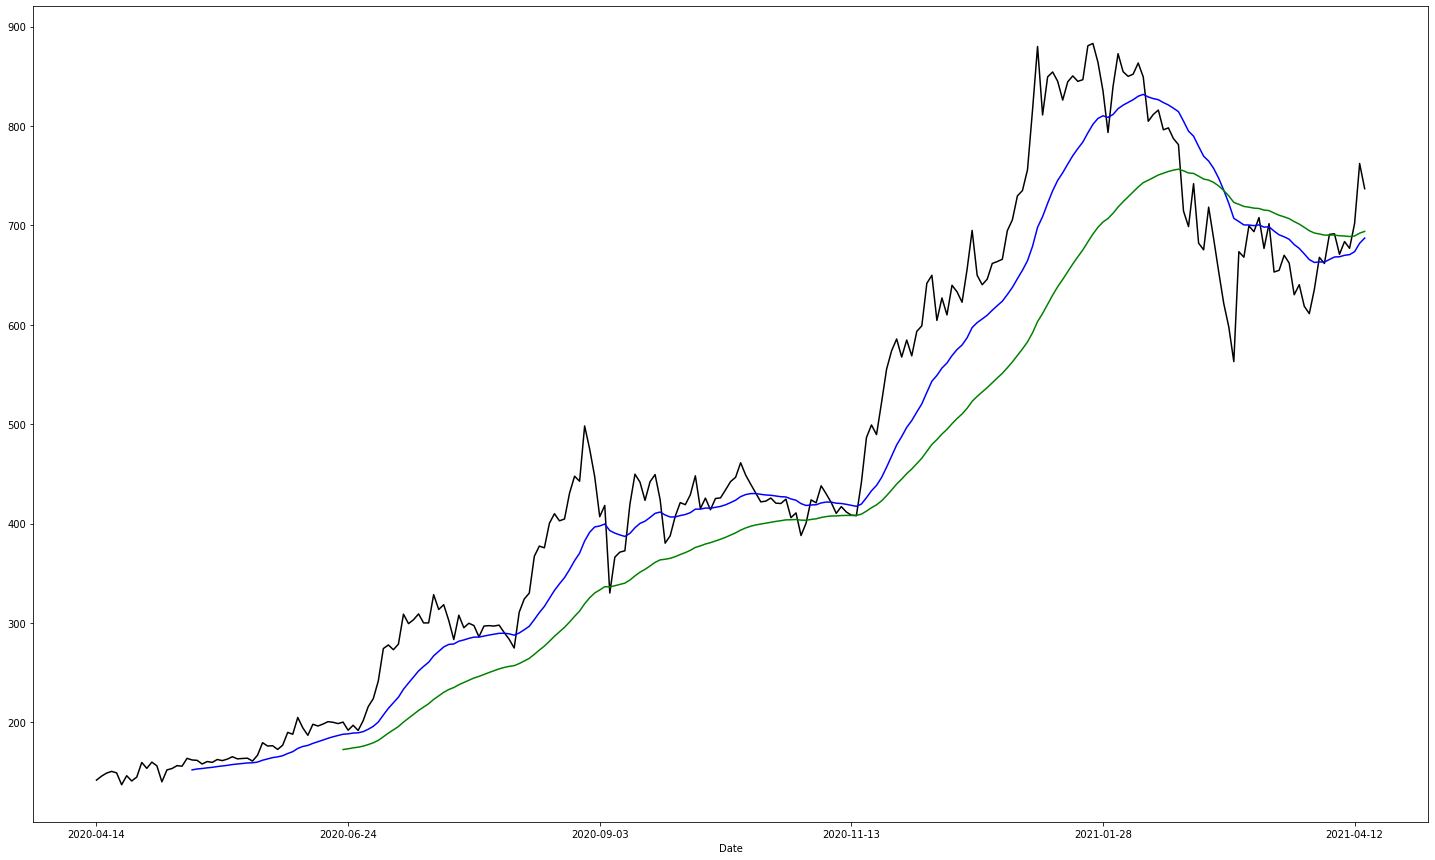

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,15))
# plot close price, short-term and long-term moving averages 
TSLA['Close'].plot(color = 'k', label= 'Close') 
TSLA['ema20'].plot(color = 'b',label = '20-day EMA') 
TSLA['ema50'].plot(color = 'g', label = '50-day EMA')
# plot ‘buy’ signals
plt.plot(TSLA[TSLA['Position'] == 1].index, 
         TSLA['ema20'][TSLA['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(TSLA[TSLA['Position'] == -1].index, 
         TSLA['ema20'][TSLA['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TSLA', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# DEBUG

In [19]:
TSLA2 = TSLA.drop(TSLA[TSLA['Position'] == 0].index)
TSLA2.head()

,Open,High,Low,Close,Adj Close,Volume,ema20,ema50,sma20,sma50,Signal,Position
Date,,,,,,,,,,,,
2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500,NaN,NaN,NaN,NaN,0.0,NaN
2020-06-23,199.776001,202.399994,198.802002,200.356003,200.356003,31826500,188.145662,172.748318,186.632399,167.503041,1.0,1.0
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,418.407608,408.299023,417.706001,418.700601,0.0,-1.0
2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300,446.396625,422.939973,432.953998,430.072200,1.0,1.0
2021-03-03,687.989990,700.700012,651.710022,653.200012,653.200012,30208000,747.409322,739.740780,771.829498,778.380598,0.0,-1.0


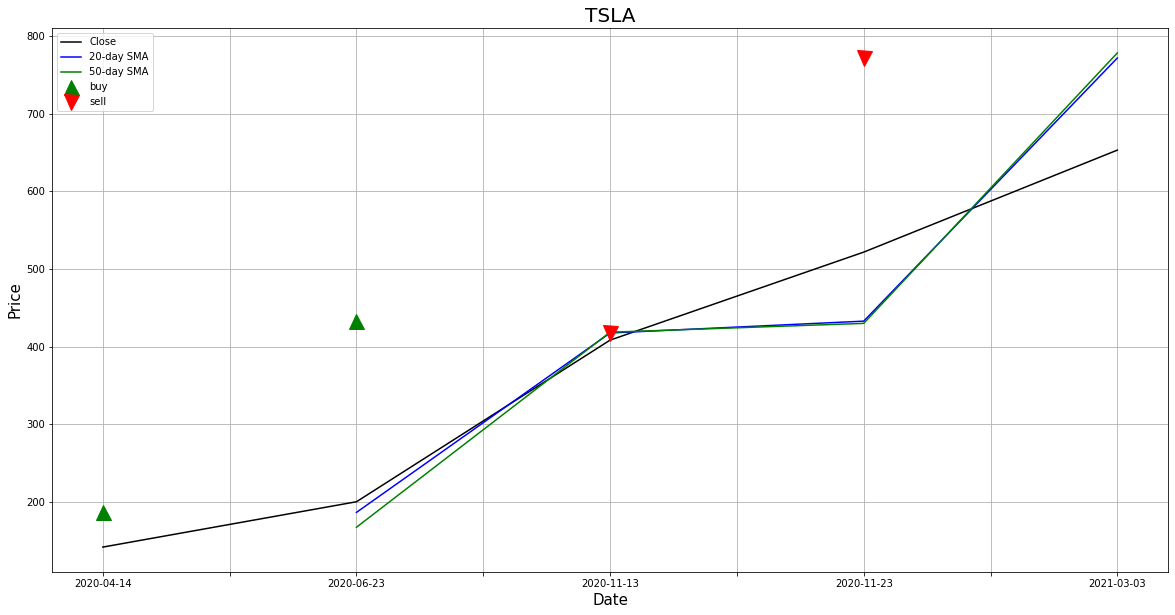

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
TSLA2['Close'].plot(color = 'k', label= 'Close') 
TSLA2['sma20'].plot(color = 'b',label = '20-day SMA') 
TSLA2['sma50'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(TSLA2[TSLA2['Position'] == 1].index, 
         TSLA2['sma20'][TSLA2['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(TSLA2[TSLA2['Position'] == -1].index, 
         TSLA2['sma20'][TSLA2['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TSLA', fontsize = 20)
plt.legend()
plt.grid()
plt.show()